# 25 marks

In [54]:
# Import libraries

import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, zscore
from sklearn.datasets import fetch_california_housing
import pymc3 as pm
import arviz as az
from model_utils import preprocess_housing
plt.rcParams.update({'font.size': 20})

In [19]:
# Load California housing dataset

california_housing = fetch_california_housing(as_frame=True)
x = california_housing.data
print(x.shape)
y = california_housing.target
print(y.shape)

(20640, 8)
(20640,)


In [4]:
# Preprocess datapoints

X_train, X_test, y_train, y_test = preprocess_housing(x,y)

data has no null values
Removed 846 outlier rows
Target value counts: 5.00001    965
Name: MedHouseVal, dtype: int64
Removed 670 skewed rows


In [56]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


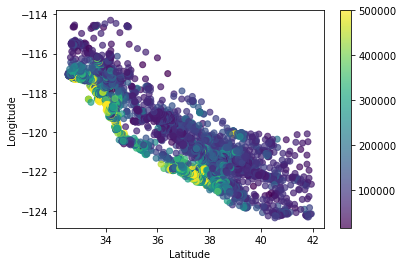

In [4]:
# Plot how longitude and latitude affect median house price

latitudes = x['Latitude']
longitudes = x['Longitude']
plt.scatter(latitudes, longitudes, c=y*100000, alpha=0.7)
plt.colorbar()
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [ ]:
# Run PyMC algorithm to get posterior distributions for each feature

num_samples = 1000
model = pm.Model()

with model:
    # Define priors
    w0 = pm.Normal('intercept', mu=0, sigma=20)
    w1 = pm.Normal('MedInc', mu=0, sigma=20)
    w2 = pm.Normal('HouseAge', mu=0, sigma=20)
    w3 = pm.Normal('AveRooms', mu=0, sigma=20)
    w4 = pm.Normal('AveBedrms', mu=0, sigma=20)
    w5 = pm.Normal('Population', mu=0, sigma=20)
    w6 = pm.Normal('AveOccup', mu=0, sigma=20)
    w7 = pm.Normal('Latitude', mu=0, sigma=20)
    w8 = pm.Normal('Longitude', mu=0, sigma=20)
    sigma = pm.Uniform('sigma', lower=0, upper=20)

    y_est = w0 + w1*x["MedInc"] + w2*x["HouseAge"] + w3*xp["AveRooms"] + w4*x["AveBedrms"] + w5*x["Population"] + w6*x.loc[:,"AveOccup"] + w7*x.loc[:,"Latitude"] + w8*x.loc[:,"Longitude"]

    likelihood = pm.Normal('y', mu=y_est, sigma=sigma, observed=y)
    
    sampler = pm.NUTS()
    
    idata = pm.sample(num_samples, sampler, progressbar=True, cores=4, chains=2)

/var/folders/8g/b7_xy_gx7ysgvrt10qyzhv7c0000gn/T/ipykernel_41485/1119297853.py:24: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  idata = pm.sample(num_samples, sampler, progressbar=True, cores=4, chains=2)
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sigma, w8, w7, w6, w5, w4, w3, w2, w1, w0]


In [7]:
input_d = pickle.load(open('sampler_inference.pkl', 'rb'))

In [8]:
az.summary(input_d, round_to=4)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
w0,-31.7545,0.6710,-33.0370,-30.5436,0.0194,0.0137,1196.9260,1670.8350,1.0015
w1,0.4621,0.0057,0.4515,0.4727,0.0001,0.0001,1726.8274,2436.1334,1.0005
w2,0.0103,0.0005,0.0094,0.0112,0.0000,0.0000,2331.8931,2489.0649,1.0005
w3,-0.1496,0.0072,-0.1637,-0.1368,0.0002,0.0001,1692.9944,2651.2691,1.0003
w4,1.1197,0.0470,1.0347,1.2134,0.0010,0.0007,2285.5094,2543.3203,1.0002
w5,0.0000,0.0000,0.0000,0.0001,0.0000,0.0000,2747.8480,2553.6488,1.0025
w6,-0.2293,0.0062,-0.2403,-0.2172,0.0001,0.0001,3171.9939,2444.9142,1.0009
w7,-0.3747,0.0075,-0.3887,-0.3610,0.0002,0.0002,1187.3540,1791.1586,1.0016
w8,-0.3784,0.0077,-0.3929,-0.3646,0.0002,0.0002,1139.9921,1663.0992,1.0018
sigma,0.6022,0.0036,0.5957,0.6089,0.0001,0.0000,3641.9402,2851.7976,1.0003


In [13]:
# Save pymc results in pkl format

pickle.dump(input_d.posterior, open("posteriors.pkl", "wb"))
pickle.dump(input_d.sample_stats, open("sample_stats.pkl", "wb"))
pickle.dump(input_d.observed_data, open("observed_data.pkl", "wb"))

In [38]:
# Load posteriors from pkl file

posteriors = pickle.load(open('posteriors.pkl', 'rb'))

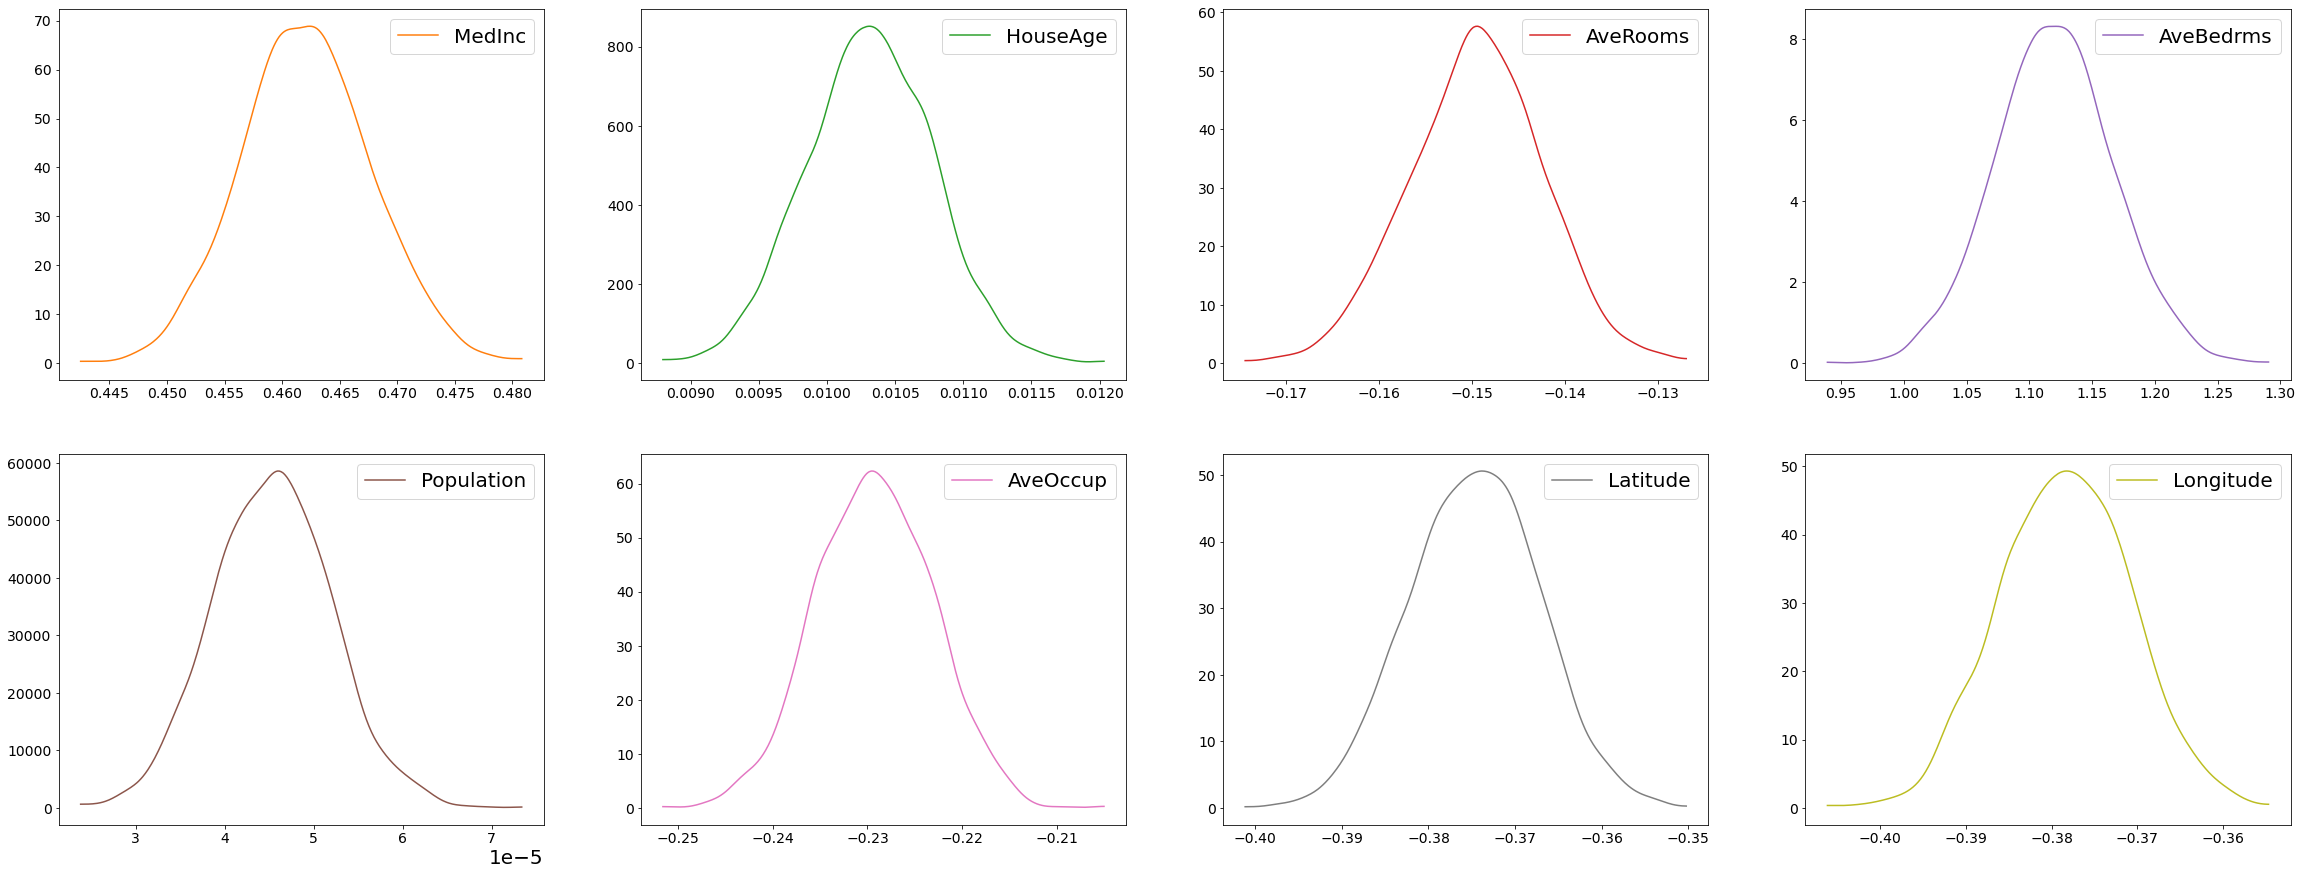

In [58]:
# Plot each posterior distribution

features = ["MedInc" ,"HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "Latitude", "Longitude"]
posterior_names = ['w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8']

_, ax = plt.subplots(2, 4, figsize=(40, 15))
az.plot_dist(posteriors['w1'], color="C1", label="MedInc", ax=ax[0][0])
az.plot_dist(posteriors['w2'], color="C2", label="HouseAge", ax=ax[0][1])
az.plot_dist(posteriors['w3'], color="C3", label="AveRooms", ax=ax[0][2])
az.plot_dist(posteriors['w4'], color="C4", label="AveBedrms", ax=ax[0][3])
az.plot_dist(posteriors['w5'], color="C5", label="Population", ax=ax[1][0])
az.plot_dist(posteriors['w6'], color="C6", label="AveOccup", ax=ax[1][1])
az.plot_dist(posteriors['w7'], color="C7", label="Latitude", ax=ax[1][2])
az.plot_dist(posteriors['w8'], color="C8", label="Longitude", ax=ax[1][3])

plt.show()